<a href="https://colab.research.google.com/github/Data-manTejas/InternshipProjects/blob/main/IPL_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
byb = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [4]:
byb

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143290,1082620,1,7,1,AM Rahane,RA Tripathi,PP Chawla,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Rising Pune Supergiant,Kolkata Knight Riders
143291,1082620,1,7,2,RA Tripathi,AM Rahane,PP Chawla,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Rising Pune Supergiant,Kolkata Knight Riders
143292,1082620,1,7,3,RA Tripathi,AM Rahane,PP Chawla,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Rising Pune Supergiant,Kolkata Knight Riders
143293,1082620,1,7,4,AM Rahane,RA Tripathi,PP Chawla,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Rising Pune Supergiant,Kolkata Knight Riders


In [5]:
byb.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               1
total_runs               1
non_boundary             1
is_wicket                1
dismissal_kind      136250
player_dismissed    136250
fielder             138217
extras_type         135459
batting_team             1
bowling_team           192
dtype: int64

In [7]:
byb.sample(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
80796,598016,1,5,4,Mandeep Singh,M Vohra,SMSM Senanayake,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kings XI Punjab,Kolkata Knight Riders
100780,733983,2,2,3,PA Patel,CH Gayle,P Suyal,4,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
121876,829819,2,15,5,CH Morris,DJ Hooda,MA Starc,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore
123890,980913,1,0,1,M Vijay,M Vohra,Z Khan,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kings XI Punjab,Delhi Daredevils
53530,501249,1,3,6,MEK Hussey,M Vijay,SR Watson,2,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,Chennai Super Kings,Rajasthan Royals


In [8]:
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143295 entries, 0 to 143294
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                143295 non-null  int64  
 1   inning            143295 non-null  int64  
 2   over              143295 non-null  int64  
 3   ball              143295 non-null  int64  
 4   batsman           143295 non-null  object 
 5   non_striker       143295 non-null  object 
 6   bowler            143295 non-null  object 
 7   batsman_runs      143295 non-null  int64  
 8   extra_runs        143294 non-null  float64
 9   total_runs        143294 non-null  float64
 10  non_boundary      143294 non-null  float64
 11  is_wicket         143294 non-null  float64
 12  dismissal_kind    7045 non-null    object 
 13  player_dismissed  7045 non-null    object 
 14  fielder           5078 non-null    object 
 15  extras_type       7836 non-null    object 
 16  batting_team      14

In [9]:
data=byb[['batsman','non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'batting_team', 'bowling_team']].copy()

In [14]:
data.sample()

,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
104549,DJG Sammy,IK Pathan,PP Chawla,0,0.0,0.0,0.0,0.0,Sunrisers Hyderabad,Kolkata Knight Riders


In [15]:
batsman=data[['batsman', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary','batting_team']]
batsman

,batsman,batsman_runs,extra_runs,total_runs,non_boundary,batting_team
0,RT Ponting,1,0.0,1.0,0.0,Kolkata Knight Riders
1,BB McCullum,1,0.0,1.0,0.0,Kolkata Knight Riders
2,BB McCullum,0,0.0,0.0,0.0,Kolkata Knight Riders
3,BB McCullum,1,0.0,1.0,0.0,Kolkata Knight Riders
4,RT Ponting,1,0.0,1.0,0.0,Kolkata Knight Riders
...,...,...,...,...,...,...
143290,AM Rahane,1,0.0,1.0,0.0,Rising Pune Supergiant
143291,RA Tripathi,0,0.0,0.0,0.0,Rising Pune Supergiant
143292,RA Tripathi,1,0.0,1.0,0.0,Rising Pune Supergiant
143293,AM Rahane,1,0.0,1.0,0.0,Rising Pune Supergiant


In [16]:
batsman.batting_team=batsman.batting_team.str.replace("Rising Pune Supergiants","Rising Pune Supergiant")

<ipython-input-16-872fd6494372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman.batting_team=batsman.batting_team.str.replace("Rising Pune Supergiants","Rising Pune Supergiant")


In [20]:
a=batsman.groupby('batsman').sum().sort_values("total_runs",ascending=False).reset_index().head(10)
a

<ipython-input-20-b67d7a0f2162>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=batsman.groupby('batsman').sum().sort_values("total_runs",ascending=False).reset_index().head(10)


,batsman,batsman_runs,extra_runs,total_runs,non_boundary
0,SK Raina,4373,191.0,4564.0,0.0
1,V Kohli,4264,161.0,4425.0,2.0
2,G Gambhir,3901,242.0,4143.0,0.0
3,RG Sharma,3986,113.0,4099.0,1.0
4,DA Warner,3655,192.0,3847.0,0.0
5,RV Uthappa,3626,209.0,3835.0,0.0
6,CH Gayle,3570,259.0,3829.0,1.0
7,MS Dhoni,3400,156.0,3556.0,0.0
8,AB de Villiers,3402,130.0,3532.0,0.0
9,S Dhawan,3317,184.0,3501.0,0.0


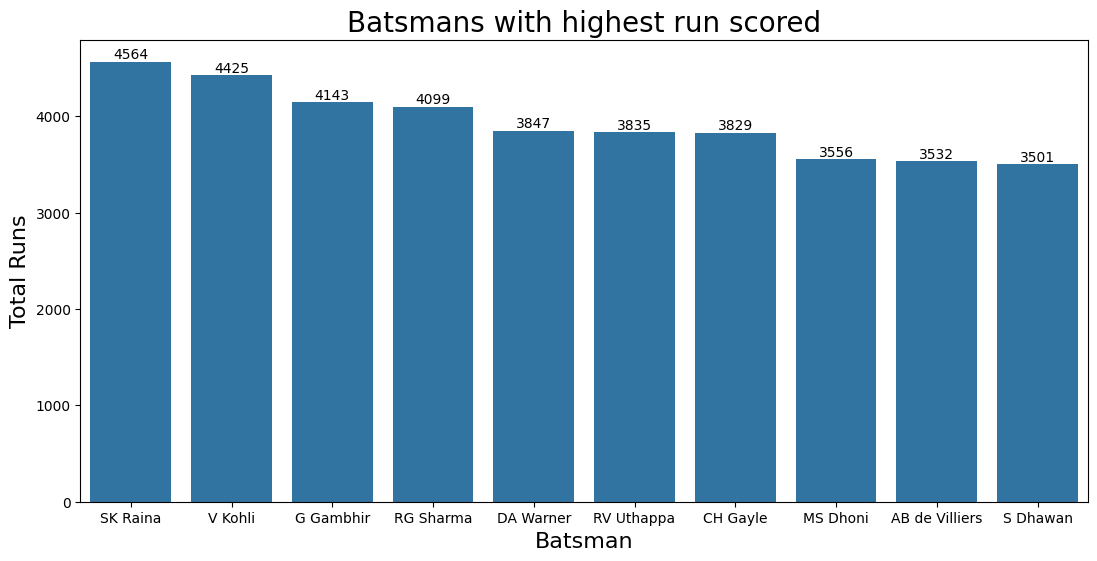

In [21]:
plt.figure(figsize=(13,6))
aviz=sns.barplot(a,x='batsman',y='total_runs')
plt.bar_label(container=aviz.containers[0],fmt="%.f")
plt.xlabel("Batsman",fontsize=16)
plt.ylabel("Total Runs",fontsize=16)
plt.title("Batsmans with highest run scored",fontsize=20)
plt.show()

In [22]:
b=batsman.groupby("batting_team").sum().reset_index()
b

<ipython-input-22-14af401050b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=batsman.groupby("batting_team").sum().reset_index()


,batting_team,batsman_runs,extra_runs,total_runs,non_boundary
0,Chennai Super Kings,19814,1076.0,20890.0,0.0
1,Deccan Chargers,10885,578.0,11463.0,0.0
2,Delhi Daredevils,19596,1134.0,20730.0,0.0
3,Gujarat Lions,3483,175.0,3658.0,0.0
4,Kings XI Punjab,20805,1192.0,21997.0,4.0
5,Kochi Tuskers Kerala,1758,143.0,1901.0,0.0
6,Kolkata Knight Riders,19481,1242.0,20723.0,2.0
7,Mumbai Indians,21737,1327.0,23064.0,3.0
8,Pune Warriors,6040,318.0,6358.0,0.0
9,Rajasthan Royals,16750,918.0,17668.0,1.0


Text(0.5, 1.0, 'Total runs scored per team')

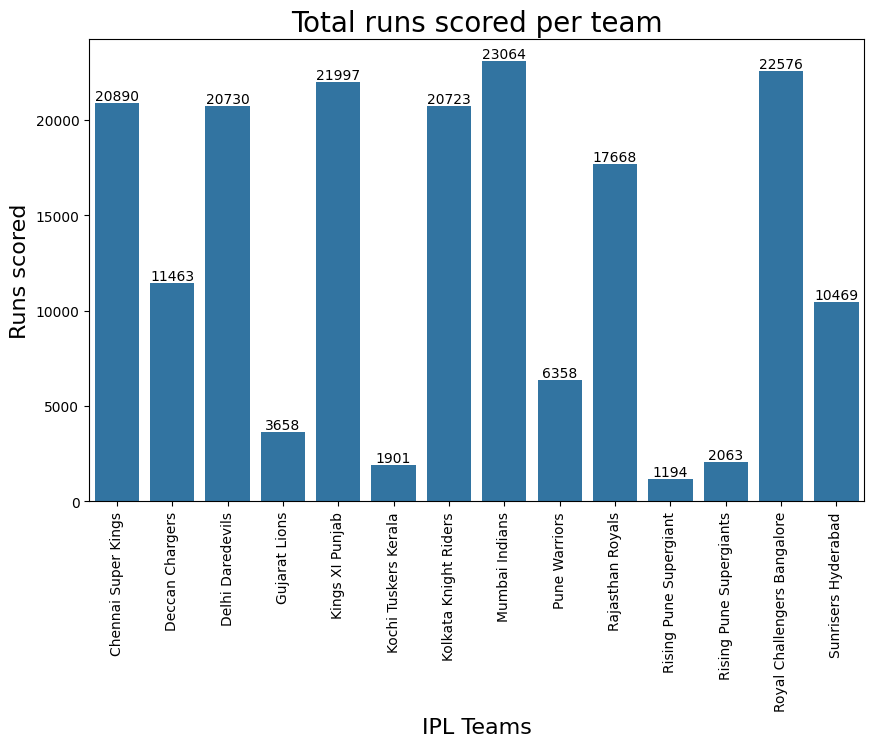

In [23]:
plt.figure(figsize=(10,6))
bviz=sns.barplot(b,x="batting_team",y='total_runs')
plt.bar_label(container=bviz.containers[0],fmt="%.f")
plt.xticks(rotation=90)
plt.xlabel("IPL Teams",fontsize=16)
plt.ylabel("Runs scored",fontsize=16)
plt.title("Total runs scored per team",fontsize=20)

In [24]:
bowlers=data[['batsman','bowler', 'batsman_runs', 'extra_runs', 'total_runs','is_wicket', 'bowling_team']]
bowlers

,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,bowling_team
0,RT Ponting,AA Noffke,1,0.0,1.0,0.0,Royal Challengers Bangalore
1,BB McCullum,AA Noffke,1,0.0,1.0,0.0,Royal Challengers Bangalore
2,BB McCullum,Z Khan,0,0.0,0.0,0.0,Royal Challengers Bangalore
3,BB McCullum,Z Khan,1,0.0,1.0,0.0,Royal Challengers Bangalore
4,RT Ponting,Z Khan,1,0.0,1.0,0.0,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
143290,AM Rahane,PP Chawla,1,0.0,1.0,0.0,Kolkata Knight Riders
143291,RA Tripathi,PP Chawla,0,0.0,0.0,0.0,Kolkata Knight Riders
143292,RA Tripathi,PP Chawla,1,0.0,1.0,0.0,Kolkata Knight Riders
143293,AM Rahane,PP Chawla,1,0.0,1.0,0.0,Kolkata Knight Riders


In [25]:
bowlers.bowling_team=bowlers.bowling_team.str.replace("Rising Pune Supergiants","Rising Pune Supergiant")

<ipython-input-25-8222fc5dda9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowlers.bowling_team=bowlers.bowling_team.str.replace("Rising Pune Supergiants","Rising Pune Supergiant")


In [26]:
c=bowlers.groupby('bowler').sum("is_wicket").reset_index().sort_values("is_wicket",ascending=False).head(10)
c

,bowler,batsman_runs,extra_runs,total_runs,is_wicket
291,SL Malinga,2570,253.0,2823.0,163.0
5,A Mishra,2986,111.0,3097.0,139.0
86,DJ Bravo,2658,157.0,2815.0,137.0
115,Harbhajan Singh,3183,157.0,3340.0,132.0
226,PP Chawla,3092,116.0,3208.0,129.0
241,R Vinay Kumar,2815,110.0,2925.0,123.0
7,A Nehra,2376,114.0,2490.0,117.0
352,Z Khan,2570,159.0,2729.0,115.0
231,R Ashwin,2409,143.0,2552.0,110.0
48,B Kumar,2058,153.0,2211.0,105.0


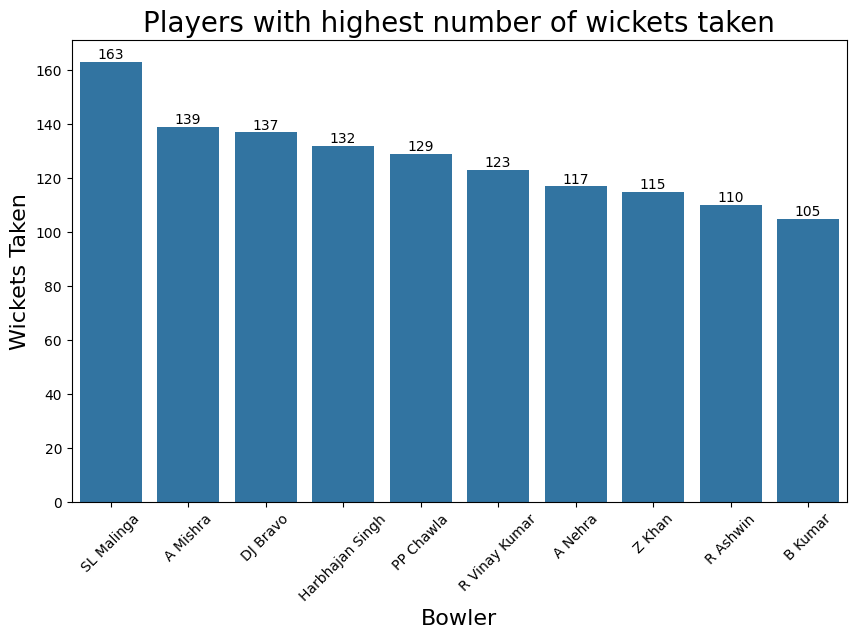

In [27]:
plt.figure(figsize=(10,6))
cplot=sns.barplot(c,x="bowler",y='is_wicket')
plt.bar_label(container=cplot.containers[0],fmt="%.f")
plt.xticks(rotation=45)
plt.xlabel("Bowler",fontsize=16)
plt.ylabel("Wickets Taken",fontsize=16)
plt.title("Players with highest number of wickets taken",fontsize=20)
plt.show()

In [28]:
d=bowlers.groupby("bowling_team").sum("is_wicket").reset_index()
d

,bowling_team,batsman_runs,extra_runs,total_runs,is_wicket
0,Chennai Super Kings,18778,1002.0,19780.0,819.0
1,Deccan Chargers,10959,659.0,11618.0,446.0
2,Delhi Daredevils,19864,1113.0,20977.0,798.0
3,Gujarat Lions,3721,146.0,3867.0,108.0
4,Kings XI Punjab,21021,1195.0,22216.0,790.0
5,Kochi Tuskers Kerala,1876,110.0,1986.0,74.0
6,Kolkata Knight Riders,19495,1130.0,20625.0,810.0
7,Mumbai Indians,21187,1330.0,22517.0,888.0
8,Pune Warriors,6471,330.0,6801.0,235.0
9,Rajasthan Royals,16575,1038.0,17613.0,692.0


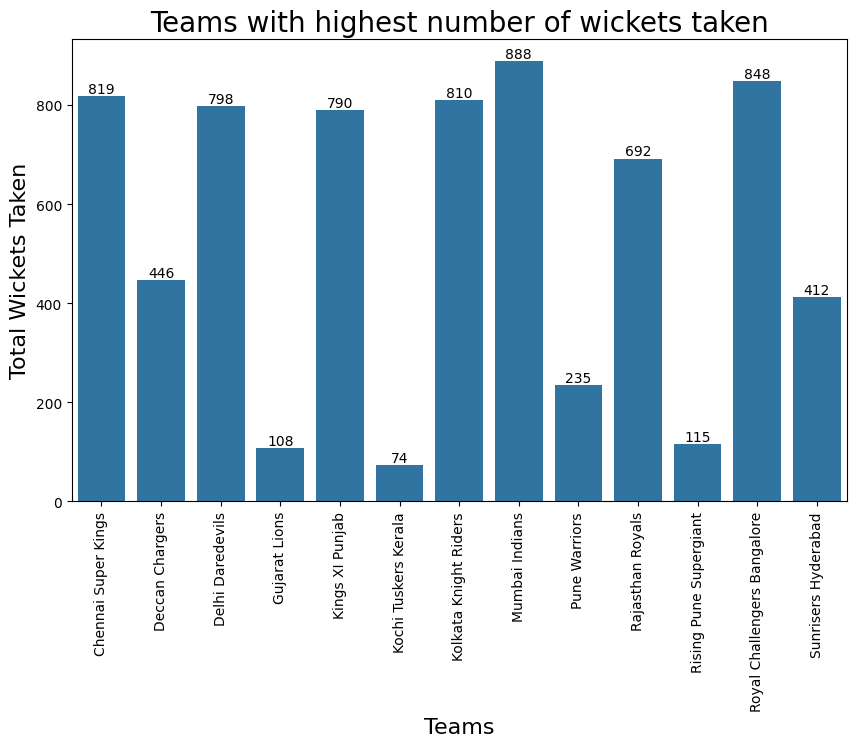

In [29]:
plt.figure(figsize=(10,6))
dplot=sns.barplot(d,x="bowling_team",y='is_wicket')
plt.bar_label(container=dplot.containers[0],fmt="%.f")
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=16)
plt.ylabel("Total Wickets Taken",fontsize=16)
plt.title("Teams with highest number of wickets taken",fontsize=20)
plt.show()

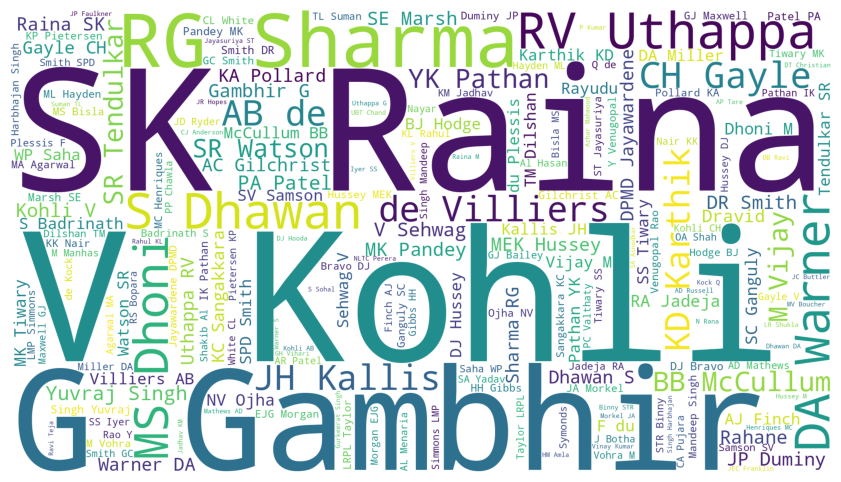

In [31]:
from wordcloud import WordCloud as wc
plt.figure(figsize=(15,6))
wd=wc(background_color="white",width=1920,height=1080).generate(" ".join(data.batsman))
plt.axis("off")
plt.imshow(wd)